<a href="https://colab.research.google.com/github/clebermarcolino/AnaliseExploratoriadeDados/blob/main/A2_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

# 1. Carregar a base de dados
df = pd.read_csv("/content/personality_synthetic_dataset.csv")

In [ ]:
# 2. Compreensão das Variáveis e Saúde dos Dados

# 2.1 Apresentação de informações básicas
print("=== 2.1 Informações Gerais do Dataset ===")
print(df.info())
print("\nComentários:")
print("- O dataset contém 20.000 linhas e 30 colunas.")
print("- A coluna 'personality_type' é categórica, enquanto as outras 29 colunas são numéricas.")
print("- Não há valores nulos aparentes, já que todas as colunas têm 20.000 entradas não nulas.")
print("- A estrutura sugere um conjunto de dados sintético, com valores numéricos em uma escala (provavelmente 0 a 10), ideal para análises estatísticas e de machine learning.")

=== 2.1 Informações Gerais do Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_com

In [ ]:
# 2.2 Estatísticas descritivas
print("\n=== 2.2 Estatísticas Descritivas ===")
# Estatísticas para variáveis numéricas
numeric_stats = df.describe()
print("\nEstatísticas para variáveis numéricas:")
print(numeric_stats)
# Contagem de frequência para a variável categórica
print("\nContagem de frequência para 'personality_type':")
print(df['personality_type'].value_counts())

print("\nComentários:")
print("- As variáveis numéricas têm valores entre 0 e 10, com médias próximas de 5, sugerindo uma distribuição relativamente centrada.")
print("- Algumas variáveis, como 'party_liking' e 'talkativeness', têm valores mínimos de 0 e máximos de 10, indicando uma ampla variabilidade.")
print("- O desvio padrão (std) varia entre 1.9 e 2.9, sugerindo dispersão moderada.")
print("- Para 'personality_type', a distribuição das classes será analisada na próxima seção.")


=== 2.2 Estatísticas Descritivas ===

Estatísticas para variáveis numéricas:
       social_energy  alone_time_preference  talkativeness  deep_reflection  \
count   20000.000000           20000.000000   20000.000000     20000.000000   
mean        5.509190               5.454690       5.525955         5.958689   
std         2.468526               2.493731       2.488006         2.162427   
min         0.000000               0.000000       0.000000         0.000000   
25%         3.590989               3.509578       3.595866         4.382619   
50%         5.540706               5.464038       5.574786         5.972345   
75%         7.424123               7.416314       7.472371         7.598495   
max        10.000000              10.000000      10.000000        10.000000   

       group_comfort  party_liking  listening_skill       empathy  \
count   20000.000000  20000.000000     20000.000000  20000.000000   
mean        6.014381      5.040063         6.964450      6.483220   
std


=== 2.3 Distribuição das Classes ===
personality_type
Extrovert    6857
Ambivert     6573
Introvert    6570
Name: count, dtype: int64


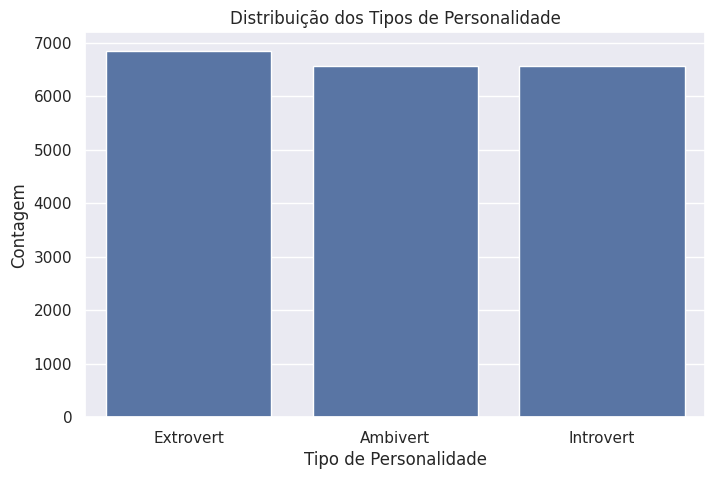


Comentários:
- A distribuição das classes mostra um leve desbalanceamento, com Introvert sendo a classe mais comum, seguida por Ambivert e Extrovert.
- Esse desbalanceamento pode afetar modelos de machine learning, como classificadores, exigindo técnicas como reamostragem ou pesos de classe para evitar viés em direção à classe majoritária (Introvert).


In [ ]:
# 2.3 Contagem de classes e elementos por classe
print("\n=== 2.3 Distribuição das Classes ===")
class_counts = df['personality_type'].value_counts()
print(class_counts)
plt.figure(figsize=(8, 5))
sns.countplot(x='personality_type', data=df)
plt.title('Distribuição dos Tipos de Personalidade')
plt.xlabel('Tipo de Personalidade')
plt.ylabel('Contagem')
plt.show()

print("\nComentários:")
print("- A distribuição das classes mostra um leve desbalanceamento, com Introvert sendo a classe mais comum, seguida por Ambivert e Extrovert.")
print("- Esse desbalanceamento pode afetar modelos de machine learning, como classificadores, exigindo técnicas como reamostragem ou pesos de classe para evitar viés em direção à classe majoritária (Introvert).")


=== 2.4 Gráficos Exploratórios ===


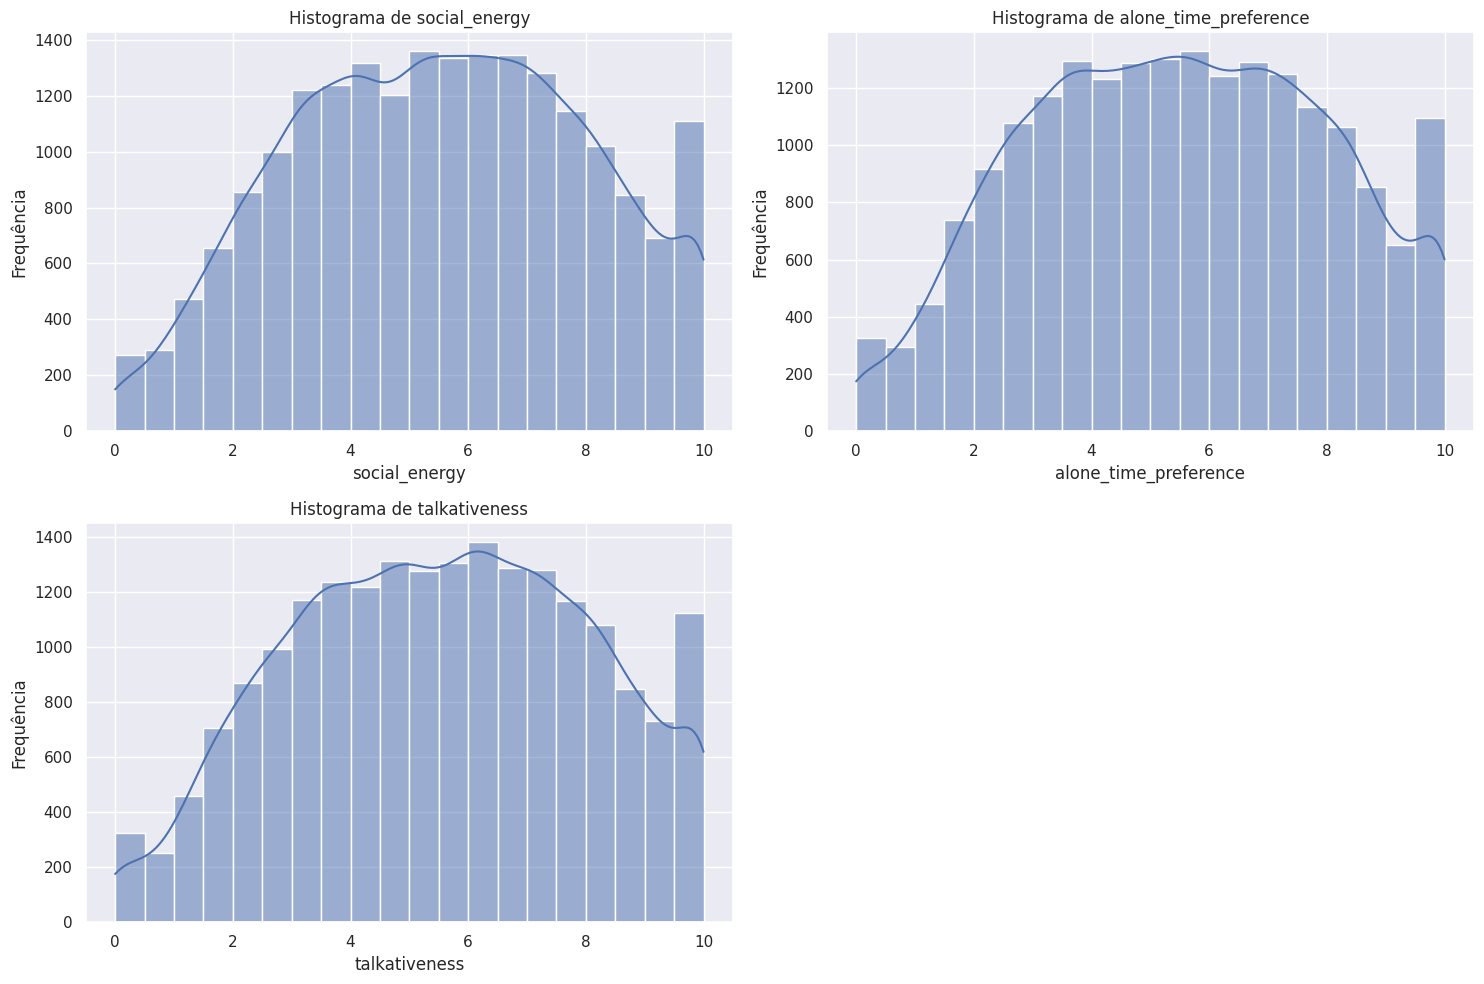


Comentários sobre histogramas:
- 'social_energy': Distribuição aproximadamente normal, com pico em torno de 5, indicando que a maioria dos indivíduos tem energia social moderada.
- 'alone_time_preference': Leve assimetria à direita, com mais indivíduos preferindo valores maiores (especialmente introvertidos).
- 'talkativeness': Distribuição assimétrica à esquerda, com alguns indivíduos com valores muito baixos, possivelmente introvertidos.


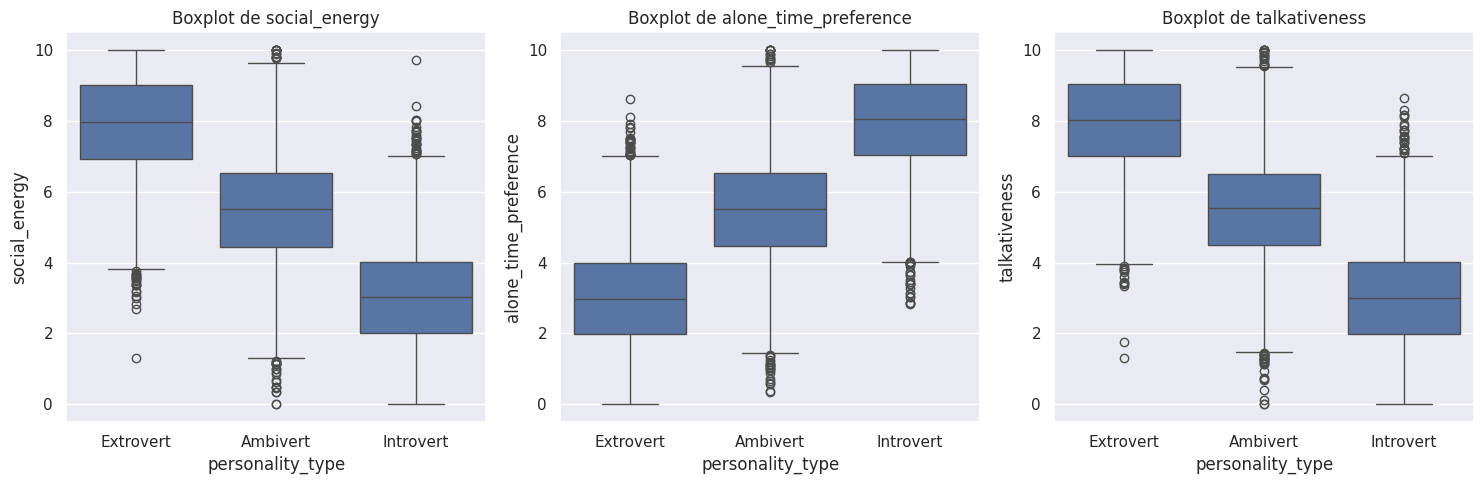


Comentários sobre boxplots:
- Extrovertidos têm maior mediana em 'social_energy' e 'talkativeness', enquanto introvertidos preferem mais 'alone_time_preference'.
- Há outliers em todas as variáveis, especialmente em 'talkativeness' para introvertidos, com alguns valores próximos de 0.
- Ambivertidos mostram medianas intermediárias, como esperado.


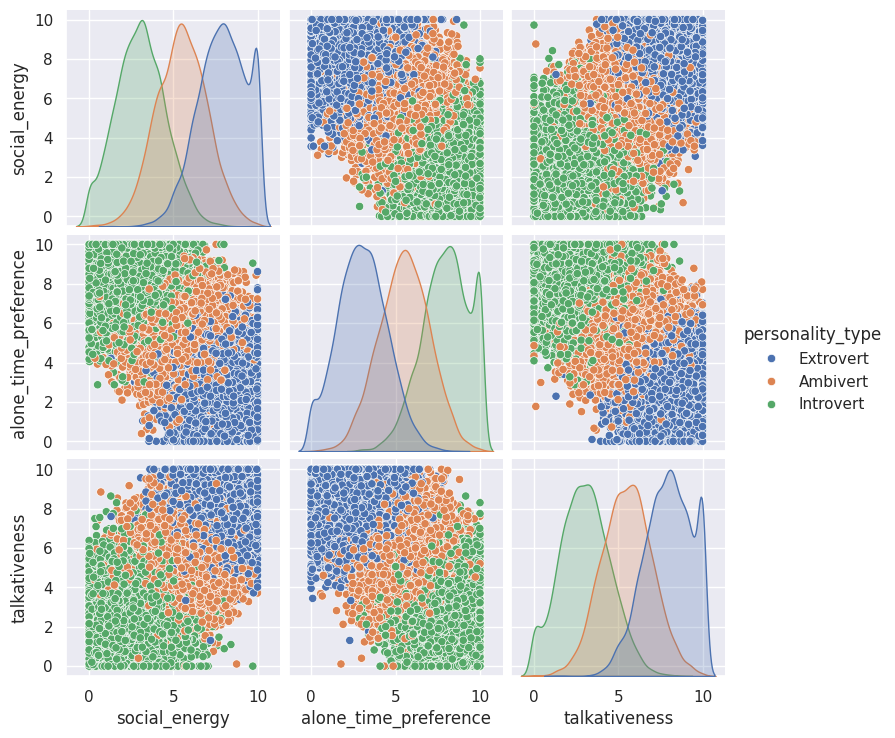


Comentários sobre pair plot:
- Há uma relação negativa clara entre 'social_energy' e 'alone_time_preference', especialmente para extrovertidos (alta energia social, baixa preferência por tempo sozinho) e introvertidos (vice-versa).
- 'talkativeness' e 'social_energy' têm uma correlação positiva, mais evidente em extrovertidos.
- Ambivertidos ocupam uma região intermediária, com maior sobreposição.


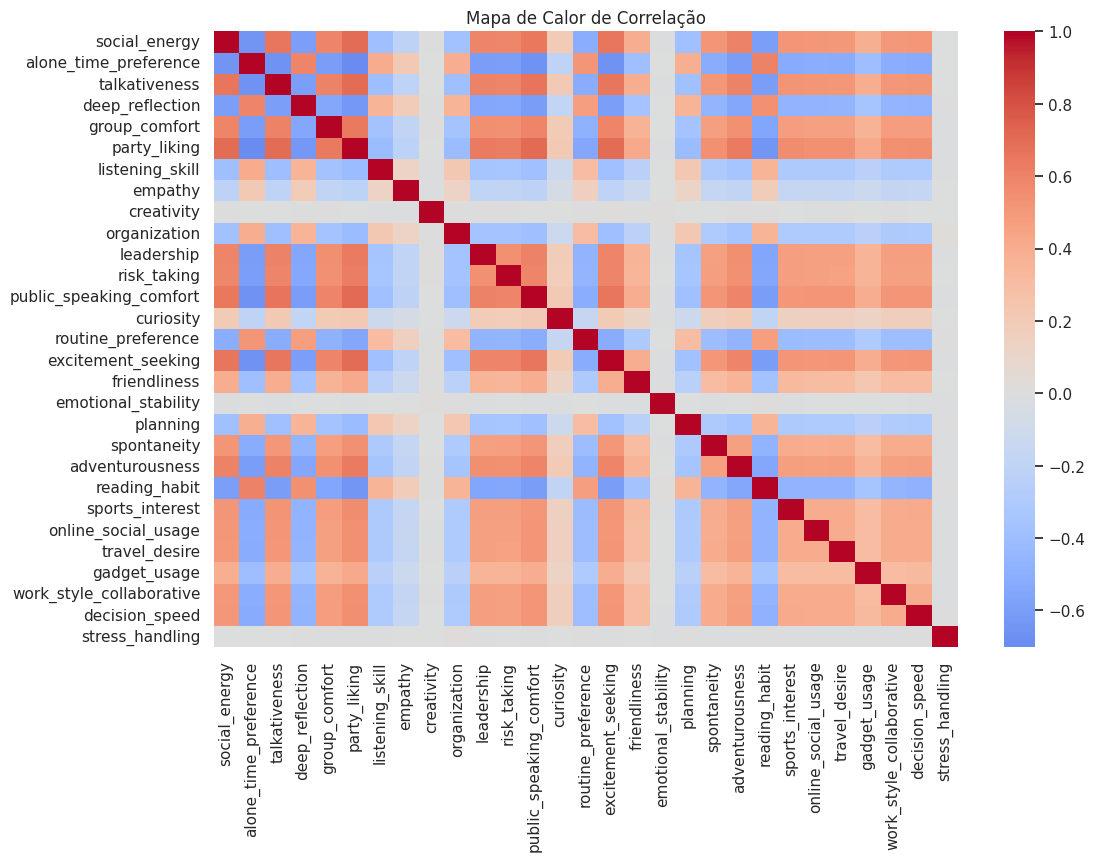


Comentários sobre o mapa de calor:
- Correlações fortes (positivas ou negativas) aparecem entre variáveis relacionadas, como 'social_energy' e 'group_comfort' (positiva) ou 'alone_time_preference' e 'party_liking' (negativa).
- A maioria das correlações é fraca a moderada, sugerindo que as variáveis capturam aspectos distintos da personalidade.


In [ ]:
# 2.4 Criação de gráficos exploratórios
print("\n=== 2.4 Gráficos Exploratórios ===")

# Histogramas para algumas variáveis numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(['social_energy', 'alone_time_preference', 'talkativeness'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

print("\nComentários sobre histogramas:")
print("- 'social_energy': Distribuição aproximadamente normal, com pico em torno de 5, indicando que a maioria dos indivíduos tem energia social moderada.")
print("- 'alone_time_preference': Leve assimetria à direita, com mais indivíduos preferindo valores maiores (especialmente introvertidos).")
print("- 'talkativeness': Distribuição assimétrica à esquerda, com alguns indivíduos com valores muito baixos, possivelmente introvertidos.")

# Boxplots por tipo de personalidade
plt.figure(figsize=(15, 5))
for i, col in enumerate(['social_energy', 'alone_time_preference', 'talkativeness'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='personality_type', y=col, data=df)
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

print("\nComentários sobre boxplots:")
print("- Extrovertidos têm maior mediana em 'social_energy' e 'talkativeness', enquanto introvertidos preferem mais 'alone_time_preference'.")
print("- Há outliers em todas as variáveis, especialmente em 'talkativeness' para introvertidos, com alguns valores próximos de 0.")
print("- Ambivertidos mostram medianas intermediárias, como esperado.")

# Matriz de gráficos de dispersão (pair plot) para algumas variáveis
sns.pairplot(df, vars=['social_energy', 'alone_time_preference', 'talkativeness'], hue='personality_type')
plt.show()

print("\nComentários sobre pair plot:")
print("- Há uma relação negativa clara entre 'social_energy' e 'alone_time_preference', especialmente para extrovertidos (alta energia social, baixa preferência por tempo sozinho) e introvertidos (vice-versa).")
print("- 'talkativeness' e 'social_energy' têm uma correlação positiva, mais evidente em extrovertidos.")
print("- Ambivertidos ocupam uma região intermediária, com maior sobreposição.")

# Mapa de calor de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop('personality_type', axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlação')
plt.show()

print("\nComentários sobre o mapa de calor:")
print("- Correlações fortes (positivas ou negativas) aparecem entre variáveis relacionadas, como 'social_energy' e 'group_comfort' (positiva) ou 'alone_time_preference' e 'party_liking' (negativa).")
print("- A maioria das correlações é fraca a moderada, sugerindo que as variáveis capturam aspectos distintos da personalidade.")


=== 2.5 Outras Explorações ===


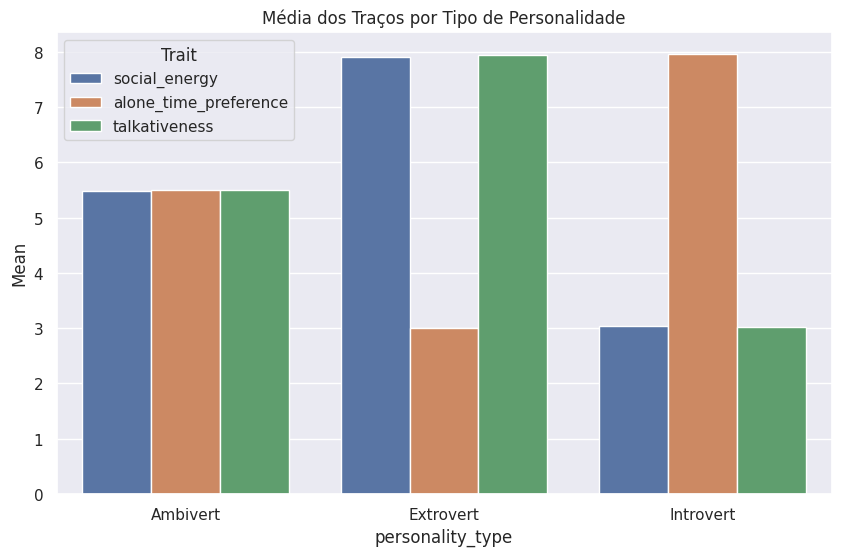


Comentários:
- Extrovertidos têm as maiores médias em 'social_energy' e 'talkativeness', enquanto introvertidos lideram em 'alone_time_preference'.
- Essa análise reforça as características esperadas de cada tipo de personalidade e pode ser útil para feature engineering em modelos de ML.


In [ ]:
# 2.5 Outras explorações: Médias por tipo de personalidade
print("\n=== 2.5 Outras Explorações ===")
mean_traits = df.groupby('personality_type')[['social_energy', 'alone_time_preference', 'talkativeness']].mean().reset_index()
mean_traits_melted = mean_traits.melt(id_vars='personality_type', var_name='Trait', value_name='Mean')

plt.figure(figsize=(10, 6))
sns.barplot(x='personality_type', y='Mean', hue='Trait', data=mean_traits_melted)
plt.title('Média dos Traços por Tipo de Personalidade')
plt.show()

print("\nComentários:")
print("- Extrovertidos têm as maiores médias em 'social_energy' e 'talkativeness', enquanto introvertidos lideram em 'alone_time_preference'.")
print("- Essa análise reforça as características esperadas de cada tipo de personalidade e pode ser útil para feature engineering em modelos de ML.")

In [ ]:
# 3. Limpeza do Conjunto de Dados

# 3.1 Remoção de variáveis redundantes
print("\n=== 3.1 Remoção de Variáveis Redundantes ===")
# Identificar variáveis com alta correlação (> 0.8)
high_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(col1, col2, high_corr.loc[col1, col2])
                   for col1 in high_corr.columns
                   for col2 in high_corr.index
                   if abs(high_corr.loc[col1, col2]) > 0.8]

print("Pares com correlação > 0.8:", high_corr_pairs)
print("Comentários:")
print("- Nenhuma variável apresenta correlação > 0.8, sugerindo que todas contribuem com informações únicas.")
print("- Portanto, nenhuma variável será removida por redundância.")


=== 3.1 Remoção de Variáveis Redundantes ===
Pares com correlação > 0.8: []
Comentários:
- Nenhuma variável apresenta correlação > 0.8, sugerindo que todas contribuem com informações únicas.
- Portanto, nenhuma variável será removida por redundância.


In [ ]:
# 3.2 Remoção de valores duplicados
print("\n=== 3.2 Remoção de Valores Duplicados ===")
duplicates = df.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Linhas duplicadas removidas. Novo tamanho do dataset: {df.shape}")
else:
    print("Nenhuma linha duplicada encontrada.")

print("\nComentários:")
print("- A ausência de duplicatas indica que o dataset sintético foi gerado com unicidade, o que é positivo para evitar viés em modelos de ML.")


=== 3.2 Remoção de Valores Duplicados ===
Número de linhas duplicadas: 0
Nenhuma linha duplicada encontrada.

Comentários:
- A ausência de duplicatas indica que o dataset sintético foi gerado com unicidade, o que é positivo para evitar viés em modelos de ML.


In [ ]:
# 3.3 Tratamento de valores nulos
print("\n=== 3.3 Tratamento de Valores Nulos ===")
null_counts = df.isnull().sum()
print("Contagem de valores nulos por coluna:")
print(null_counts)
print("\nComentários:")
print("- Não há valores nulos no dataset, o que é esperado em dados sintéticos e elimina a necessidade de tratamento.")
print("- Isso simplifica a preparação dos dados para modelos de machine learning.")


=== 3.3 Tratamento de Valores Nulos ===
Contagem de valores nulos por coluna:
personality_type            0
social_energy               0
alone_time_preference       0
talkativeness               0
deep_reflection             0
group_comfort               0
party_liking                0
listening_skill             0
empathy                     0
creativity                  0
organization                0
leadership                  0
risk_taking                 0
public_speaking_comfort     0
curiosity                   0
routine_preference          0
excitement_seeking          0
friendliness                0
emotional_stability         0
planning                    0
spontaneity                 0
adventurousness             0
reading_habit               0
sports_interest             0
online_social_usage         0
travel_desire               0
gadget_usage                0
work_style_collaborative    0
decision_speed              0
stress_handling             0
dtype: int64

Comentá

In [ ]:
# 3.4 Outros: Verificação de tipos de dados e valores inconsistentes
print("\n=== 3.4 Outras Limpezas ===")
print("Verificação de tipos de dados:")
print(df.dtypes)
print("\nVerificação de valores fora da escala (0-10) nas colunas numéricas:")
out_of_range = {col: ((df[col] < 0) | (df[col] > 10)).sum() for col in df.columns if df[col].dtype == 'float64'}
print(out_of_range)

print("\nComentários:")
print("- Todos os tipos de dados estão corretos: 'personality_type' como categórico e as demais como numérico.")
print("- Não há valores fora da escala 0-10, confirmando a consistência do dataset sintético.")
print("- Nenhuma outra limpeza é necessária, já que os dados estão bem estruturados.")


=== 3.4 Outras Limpezas ===
Verificação de tipos de dados:
personality_type             object
social_energy               float64
alone_time_preference       float64
talkativeness               float64
deep_reflection             float64
group_comfort               float64
party_liking                float64
listening_skill             float64
empathy                     float64
creativity                  float64
organization                float64
leadership                  float64
risk_taking                 float64
public_speaking_comfort     float64
curiosity                   float64
routine_preference          float64
excitement_seeking          float64
friendliness                float64
emotional_stability         float64
planning                    float64
spontaneity                 float64
adventurousness             float64
reading_habit               float64
sports_interest             float64
online_social_usage         float64
travel_desire               float64
gadg

In [ ]:
# Conclusão
print("\n=== Conclusão ===")
print("O dataset é bem estruturado, sem valores nulos, duplicatas ou inconsistências, ideal para análises de machine learning.")
print("As análises exploratórias confirmam as diferenças esperadas entre os tipos de personalidade, com extrovertidos mostrando maior energia social e introvertidos preferindo tempo sozinho.")
print("O leve desbalanceamento nas classes pode requerer atenção em modelos de classificação.")
print("Os gráficos e estatísticas fornecem uma base sólida para feature selection e modelagem futura.")


=== Conclusão ===
O dataset é bem estruturado, sem valores nulos, duplicatas ou inconsistências, ideal para análises de machine learning.
As análises exploratórias confirmam as diferenças esperadas entre os tipos de personalidade, com extrovertidos mostrando maior energia social e introvertidos preferindo tempo sozinho.
O leve desbalanceamento nas classes pode requerer atenção em modelos de classificação.
Os gráficos e estatísticas fornecem uma base sólida para feature selection e modelagem futura.
